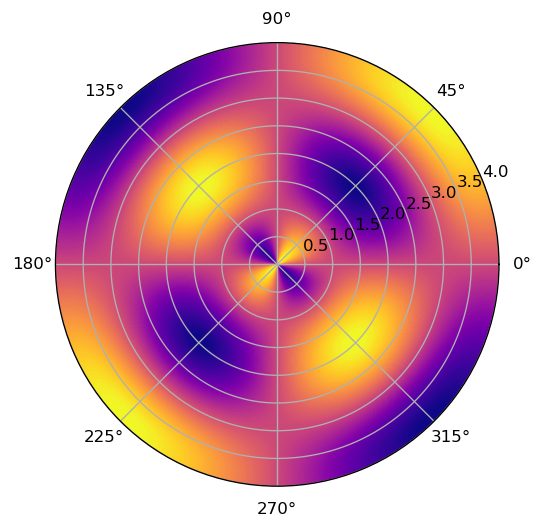

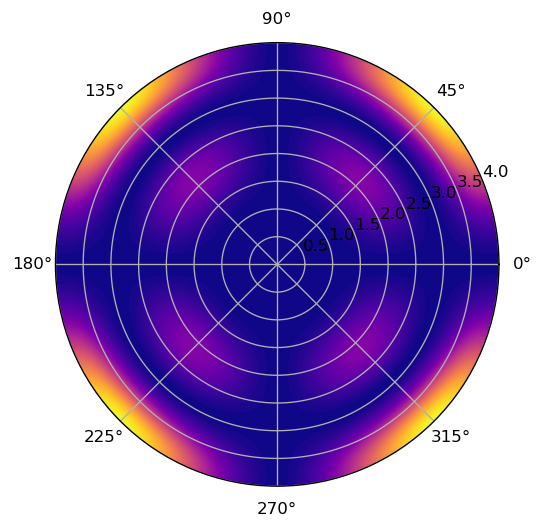

In [23]:
import numpy as np
import matplotlib.pylab as plt

np.float = float  # Redirect any 'np.float' usage to 'float'

def T(theta,a,b):        
    return a*np.sin(theta*b)   

def R(r,c,d):
    return c*np.cos(r*d)

rlist=np.arange(0,4.01,0.01)   #Angstroms
thetalist=np.radians(np.arange(0,361,1)) #Radians
rmesh, thetamesh = np.meshgrid(rlist, thetalist) #Generate a mesh

a = 1.5
b = 2
c = 2
d = 1.6

FullFunction = T(thetamesh,a,b)*R(rmesh,c,d)
FullFunction2 = FullFunction**2*rlist**2

fig, ax = plt.subplots(dpi=120,subplot_kw=dict(projection='polar'))
ax.contourf(thetamesh, rmesh, FullFunction, 100, cmap='plasma')

fig, ax = plt.subplots(dpi=120,subplot_kw=dict(projection='polar'))
ax.contourf(thetamesh, rmesh, FullFunction2, 100, cmap='plasma')

'\nprint("Array shape:", np.shape(dlnNoEcthphi))\nprint(filename)\nprint(dlnNoEcthphi)\n'

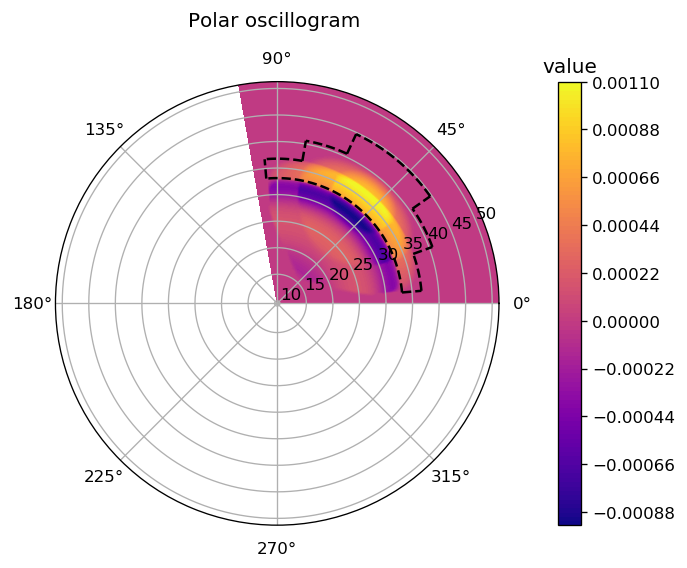

In [41]:

#/home/dehy0499/NuOscillation-Tomography/Neutrino-Tomography-Simulation/SimulationResults/PreliminaryResults/IntEvents/Events_Simulation_pancake_100Mton_1-20GeV_128-171Zen_-50-50Az

import numpy as np
import matplotlib.pylab as plt
import csv
import matplotlib.pyplot as plt
import sys
import math
from matplotlib.colors import LogNorm 

np.float = float  # Redirect any 'np.float' usage to 'float'

def csv_to_matrix(file_path):
    # Load CSV data into a numpy matrix
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        data = np.array([list(map(float, row)) for row in reader])

    return data

resultPath = "/home/dehy0499/NuOscillation-Tomography/Neutrino-Tomography-Simulation/SimulationResults/PreliminaryResults/IntEvents/"
SimulationPath = "Events_Simulation_cake_100Mton_1-10GeV_128-171Zen_-50-50Az/"

dlnNoEcthphi=[]

#azimuth = np.linspace(-50, 50, 101)
azimuth_rad = np.radians(np.linspace(-50, 50, 101)+50);

for i in range(0, 101):
    filename   = "IntcthLLVP_nu1_100Zen100Az100Enu_"+str(i)+".csv"
    eventFile  = resultPath+SimulationPath+filename
    simMatrix  = csv_to_matrix(eventFile)
    
    cosZenith = np.unique(simMatrix[:,0])
    ene = np.unique(simMatrix[:,1])
    cthv, enev = np.meshgrid(cosZenith, ene)
    
    
    NintA = simMatrix[:,2] # PREM Earth
    NintB = simMatrix[:,3] # Alternative Earth Model
    
    NintAmesh = NintA.reshape(len(cosZenith),len(ene), order = "F")
    NintBmesh = NintB.reshape(len(cosZenith),len(ene), order = "F")
    SumNoEA = NintAmesh.sum(axis=0)
    SumNoEB = NintBmesh.sum(axis=0)
    dlnNoE  = (SumNoEA-SumNoEB)/SumNoEA # Element of a specific rows correspond to values in cth
    
    dlnNoEcthphi.append(dlnNoE)
#dlnN  = simMatrix[:,4] 
zenith = 180-np.degrees(np.arccos(cosZenith))
thv, phiv = np.meshgrid(zenith, azimuth_rad)

dlnNoEcthphi_T = np.transpose(dlnNoEcthphi)

#FullFunction = T(phiv,a,b)*R(thv,c,d)

fig, ax = plt.subplots(dpi=120,subplot_kw=dict(projection='polar'))
polarplot = ax.contourf(phiv, thv, dlnNoEcthphi, 100, cmap='plasma')
ax.set_title("Polar oscillogram ", pad = 20)

cbar = plt.colorbar(polarplot, pad=0.1)
cbar.ax.set_title('value')

ax.set_rmin(10)





# Drawing LLVP


edgecolor = 'black'
line='dashed'

# Angular width
alpha_llvp = 45
alpha_l = alpha_llvp
alpha_m = 2*alpha_llvp/3
alpha_u = 1*alpha_llvp/3

alpha_low = np.radians(np.linspace(-alpha_l,alpha_l, 101)+50);
alpha_mid = np.radians(np.linspace(-alpha_m,alpha_m, 101)+50);
alpha_upp = np.radians(np.linspace(-alpha_u,alpha_u, 101)+50);

alpha_lowl = np.radians(np.linspace(-alpha_l,-alpha_m, 101)+50);
alpha_midl = np.radians(np.linspace(-alpha_m,-alpha_u, 101)+50);

alpha_lowr = np.radians(np.linspace(alpha_m,alpha_l, 101)+50);
alpha_midr = np.radians(np.linspace(alpha_u,alpha_m, 101)+50);

alpha_upp = np.radians(np.linspace(-alpha_u,alpha_u, 101)+50);



Rcmb = 3480 # Radius of Core-Mantle-Boundary
Rdet = 6371 # Radius of the detector

# Heigth
h_llvp = 1000      # Full LLVP height
h_l = h_llvp/3.0   # Lower segment LLVP
h_m = 2*h_llvp/3.0 # Mid segment LLVP
h_u = h_llvp       # Upper segment LLVP

#Eta (180 - zenith) of boundaries [deg for plotting]
etacmb =  math.asin(Rcmb/Rdet)
eta_l =   math.asin((Rcmb+h_l)/Rdet)
eta_m =   math.asin((Rcmb+h_m)/Rdet)
eta_u =   math.asin((Rcmb+h_u)/Rdet)

eta_llvps = np.degrees(np.array([etacmb, eta_l])) # In degrees
eta_mid = np.degrees(eta_m) # In degrees
eta_upp = np.degrees(eta_u) # In degrees


#Drawing contours

ax.plot(alpha_low, np.full_like(alpha_low, eta_llvps[0]), color=edgecolor,linestyle=line)
ax.plot(alpha_lowl, np.full_like(alpha_lowl, eta_llvps[1]), color=edgecolor,linestyle=line)
ax.plot(alpha_lowr, np.full_like(alpha_lowr, eta_llvps[1]), color=edgecolor,linestyle=line)

ax.plot(alpha_midl, np.full_like(alpha_midl, eta_mid), color=edgecolor,linestyle=line)
ax.plot(alpha_midr, np.full_like(alpha_midr, eta_mid), color=edgecolor,linestyle=line)

ax.plot(alpha_upp, np.full_like(alpha_upp, eta_upp), color=edgecolor,linestyle=line)

#Drawing edges

azileft_llvp = np.array([max(alpha_low),max(alpha_low),max(alpha_mid),max(alpha_upp)])
azirigth_llvp = np.array([min(alpha_low),min(alpha_low),min(alpha_mid),min(alpha_upp)])

etaedges_llvp = np.array([eta_llvps[0],eta_llvps[1],eta_mid,eta_upp])

#Rigth
ax.plot([azirigth_llvp[0],azirigth_llvp[1]],[etaedges_llvp[0],etaedges_llvp[1]], color=edgecolor,linestyle=line)
ax.plot([azirigth_llvp[2],azirigth_llvp[2]],[etaedges_llvp[1],etaedges_llvp[2]], color=edgecolor,linestyle=line)
ax.plot([azirigth_llvp[3],azirigth_llvp[3]],[etaedges_llvp[2],etaedges_llvp[3]], color=edgecolor,linestyle=line)

#Left
ax.plot([azileft_llvp[0],azileft_llvp[1]],[etaedges_llvp[0],etaedges_llvp[1]], color=edgecolor,linestyle=line)
ax.plot([azileft_llvp[2],azileft_llvp[2]],[etaedges_llvp[1],etaedges_llvp[2]], color=edgecolor,linestyle=line)
ax.plot([azileft_llvp[3],azileft_llvp[3]],[etaedges_llvp[2],etaedges_llvp[3]], color=edgecolor,linestyle=line)


#rigth 



#plt.savefig(resultPath+"cakePolarOscillogram_numu.png")

'''
print("Array shape:", np.shape(dlnNoEcthphi))
print(filename)
print(dlnNoEcthphi)
'''

#fig, ax0 = plt.subplots() 
#ax0.pcolor(cthv,enev,dlnN_mesh) 
#plt.show() 






'\nprint("Array shape:", np.shape(dlnNoEcthphi))\nprint(filename)\nprint(dlnNoEcthphi)\n'

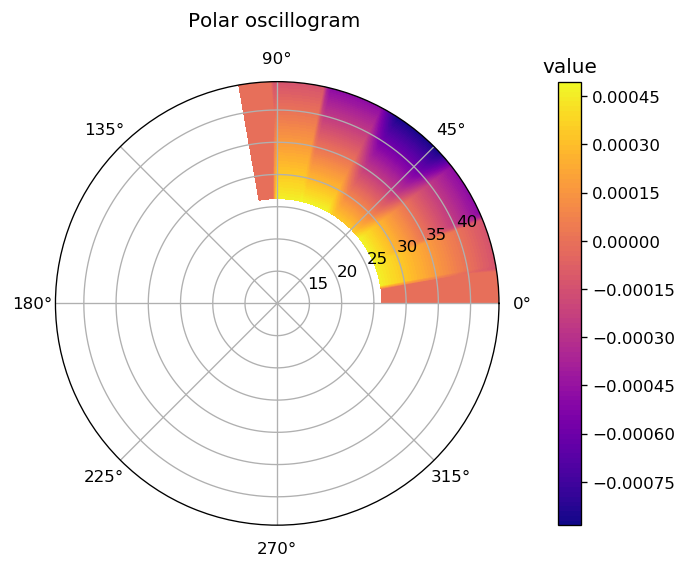

In [40]:

#/home/dehy0499/NuOscillation-Tomography/Neutrino-Tomography-Simulation/SimulationResults/PreliminaryResults/IntEvents/Events_Simulation_pancake_100Mton_1-20GeV_128-171Zen_-50-50Az

import numpy as np
import matplotlib.pylab as plt
import csv
import matplotlib.pyplot as plt
import sys
import math
from matplotlib.colors import LogNorm 

np.float = float  # Redirect any 'np.float' usage to 'float'



def T(theta,a,b):        
    return a*np.sin(theta*b)   

def R(r,c,d):
    return c*np.cos(r*d)
    

def csv_to_matrix(file_path):
    # Load CSV data into a numpy matrix
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        data = np.array([list(map(float, row)) for row in reader])

    return data

resultPath = "/home/dehy0499/NuOscillation-Tomography/Neutrino-Tomography-Simulation/SimulationResults/PreliminaryResults/ObsEvents/"
SimulationPath = "Events_Simulation_cake_100Mton_2-10GeV_128-171Zen_-55-55Az/"

dlnNoEcthphi=[]

#azimuth = np.linspace(-50, 50, 101)
azimuth_rad = np.radians(np.linspace(-50, 50, 101)+50);

for i in range(0, 101):
    filename   = "ObscthLLVP_nu1_Obs2Zen100Az2Enu_Int4Zen100Az4Enu_"+str(i)+".csv"
    eventFile  = resultPath+SimulationPath+filename
    simMatrix  = csv_to_matrix(eventFile)
    
    cosZenith = np.unique(simMatrix[:,0])
    ene = np.unique(simMatrix[:,1])
    cthv, enev = np.meshgrid(cosZenith, ene)
    
    
    NintA = simMatrix[:,2] # PREM Earth
    NintB = simMatrix[:,3] # Alternative Earth Model
    
    NintAmesh = NintA.reshape(len(cosZenith),len(ene), order = "F")
    NintBmesh = NintB.reshape(len(cosZenith),len(ene), order = "F")
    SumNoEA = NintAmesh.sum(axis=0)
    SumNoEB = NintBmesh.sum(axis=0)
    dlnNoE  = (SumNoEA-SumNoEB)/SumNoEA # Element of a specific rows correspond to values in cth
    
    dlnNoEcthphi.append(dlnNoE)
#dlnN  = simMatrix[:,4] 
zenith = 180-np.degrees(np.arccos(cosZenith))
thv, phiv = np.meshgrid(zenith, azimuth_rad)

dlnNoEcthphi_T = np.transpose(dlnNoEcthphi)

#FullFunction = T(phiv,a,b)*R(thv,c,d)

fig, ax = plt.subplots(dpi=120,subplot_kw=dict(projection='polar'))
polarplot = ax.contourf(phiv, thv, dlnNoEcthphi, 100, cmap='plasma')
ax.set_title("Polar oscillogram ", pad = 20)

cbar = plt.colorbar(polarplot, pad=0.1)
cbar.ax.set_title('value')

ax.set_rmin(10)

plt.savefig(resultPath+"PancakePolarOscillogram_nue.png")

'''
print("Array shape:", np.shape(dlnNoEcthphi))
print(filename)
print(dlnNoEcthphi)
'''

#fig, ax0 = plt.subplots() 
#ax0.pcolor(cthv,enev,dlnN_mesh) 
#plt.show() 






Cosines [ 9.50298553 10.69376352 11.76587828 12.74956398 13.66345135 14.52095573
 15.33154354 16.10230439 16.83871085 17.54509177 18.22494124 18.88112781
 19.5160408  20.13169534 20.72980958 21.31186253 21.87913818 22.43275969
 22.97371622 23.5028843  24.02104497 24.52889776 25.02707209 25.5161367
 25.99660761 26.4689546  26.93360692 27.39095793 27.84136921 28.28517403
 28.72268036 29.15417345 29.57991814 30.00016086 30.41513132 30.82504409
 31.23009997 31.63048716 32.02638238 32.41795179 32.80535188 33.18873023
 33.5682262  33.94407418 34.31619271 34.68480365 35.05001921 35.41194596
 35.77068524 36.12633352 36.47898271 36.82872045 37.1756304  37.51979248
 37.86128311 38.2001754  38.53653937 38.87044212 39.20194799 39.53111874
 39.85801366 40.18268975 40.5052018  40.82560254 41.14394272 41.46027123
 41.77463521 42.08708008 42.39764972 42.70638643 43.01333112 43.31852327
 43.62200109 43.92380153 44.22396032 44.52251207 44.81949031 45.11492751
 45.40885514 45.70130374 45.99230291 46.2818

NameError: name 'theta' is not defined

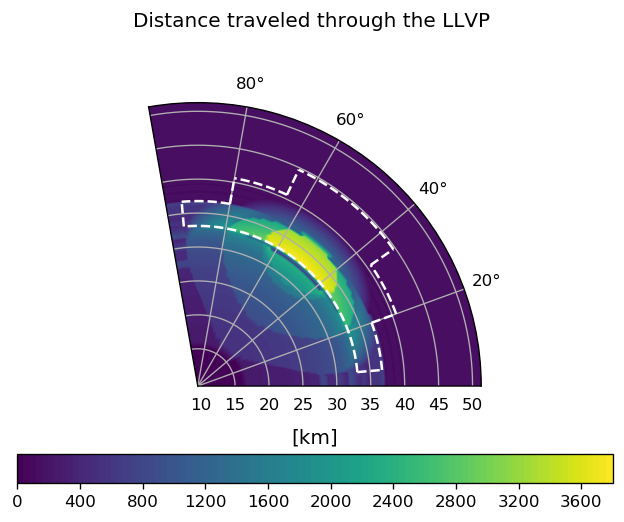

In [17]:
#/home/dehy0499/NuOscillation-Tomography/Neutrino-Tomography-Simulation/SimulationResults/PreliminaryResults/IntEvents/Events_Simulation_pancake_100Mton_1-20GeV_128-171Zen_-50-50Az

import numpy as np
import matplotlib.pylab as plt
import csv
import matplotlib.pyplot as plt
import sys
import math
from matplotlib.colors import LogNorm 

np.float = float  # Redirect any 'np.float' usage to 'float'


def T(theta,a,b):        
    return a*np.sin(theta*b)   

def R(r,c,d):
    return c*np.cos(r*d)
    

def csv_to_matrix(file_path):
    # Load CSV data into a numpy matrix
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        data = np.array([list(map(float, row)) for row in reader])

    return data

BaselinePath = "/home/dehy0499/NuOscillation-Tomography/Neutrino-Tomography-Simulation/SimulationResults/PreliminaryResults/BaselinesLLVPs/"
BaselineFile = BaselinePath+"BaselineLLVP_cake_100zenithBins_128-171Zen_100-50-50Az.csv"

dlnNoEcthphi=[]

#azimuth = np.linspace(-50, 50, 101)

BaselineMatrix  = csv_to_matrix(BaselineFile)
    
cosZenith = np.unique(BaselineMatrix[:,0])

azimuth_rad = np.radians(np.unique(BaselineMatrix[:,1])+50);

cthv, azimuthv = np.meshgrid(cosZenith, azimuth_rad)
    
L_llvp = BaselineMatrix[:,2]   
L_mesh = L_llvp.reshape(len(cosZenith),len(azimuth_rad), order = "F")
 
zenith = 180-np.degrees(np.arccos(cosZenith))

thv, phiv = np.meshgrid(zenith, azimuth_rad)

Lmesh_T = np.transpose(L_mesh)

#FullFunction = T(phiv,a,b)*R(thv,c,d)

fig1, ax1 = plt.subplots(dpi=120,subplot_kw=dict(projection='polar'))
polarplot1 = ax1.contourf(phiv, thv, L_mesh, 100, cmap='viridis')

ax1.set_thetamin(np.degrees(min(np.unique(phiv))))  # Minimum theta angle
ax1.set_thetamax(np.degrees(max(np.unique(phiv)))) # Maximum theta angle

ax1.set_title("Distance traveled through the LLVP ", pad = 20)
# Set axis labels

cbar1 = plt.colorbar(polarplot1, pad=0.1,orientation='horizontal')
cbar1.ax.set_title('[km]')



print("Cosines",np.unique(thv[1,:]))
print("azi",np.unique(BaselineMatrix[:,1]))

# Drawing LLVP
edgecolor = 'white'
line='dashed'

# Angular width
alpha_llvp = 45
alpha_l = alpha_llvp
alpha_m = 2*alpha_llvp/3
alpha_u = 1*alpha_llvp/3

alpha_low = np.radians(np.linspace(-alpha_l,alpha_l, 101)+50);
alpha_mid = np.radians(np.linspace(-alpha_m,alpha_m, 101)+50);
alpha_upp = np.radians(np.linspace(-alpha_u,alpha_u, 101)+50);

alpha_lowl = np.radians(np.linspace(-alpha_l,-alpha_m, 101)+50);
alpha_midl = np.radians(np.linspace(-alpha_m,-alpha_u, 101)+50);

alpha_lowr = np.radians(np.linspace(alpha_m,alpha_l, 101)+50);
alpha_midr = np.radians(np.linspace(alpha_u,alpha_m, 101)+50);

alpha_upp = np.radians(np.linspace(-alpha_u,alpha_u, 101)+50);



Rcmb = 3480 # Radius of Core-Mantle-Boundary
Rdet = 6371 # Radius of the detector

# Heigth
h_llvp = 1000      # Full LLVP height
h_l = h_llvp/3.0   # Lower segment LLVP
h_m = 2*h_llvp/3.0 # Mid segment LLVP
h_u = h_llvp       # Upper segment LLVP

#Eta (180 - zenith) of boundaries [deg for plotting]
etacmb =  math.asin(Rcmb/Rdet)
eta_l =   math.asin((Rcmb+h_l)/Rdet)
eta_m =   math.asin((Rcmb+h_m)/Rdet)
eta_u =   math.asin((Rcmb+h_u)/Rdet)

eta_llvps = np.degrees(np.array([etacmb, eta_l])) # In degrees
eta_mid = np.degrees(eta_m) # In degrees
eta_upp = np.degrees(eta_u) # In degrees


#Drawing contours

ax1.plot(alpha_low, np.full_like(alpha_low, eta_llvps[0]), color=edgecolor,linestyle=line)
ax1.plot(alpha_lowl, np.full_like(alpha_lowl, eta_llvps[1]), color=edgecolor,linestyle=line)
ax1.plot(alpha_lowr, np.full_like(alpha_lowr, eta_llvps[1]), color=edgecolor,linestyle=line)

ax1.plot(alpha_midl, np.full_like(alpha_midl, eta_mid), color=edgecolor,linestyle=line)
ax1.plot(alpha_midr, np.full_like(alpha_midr, eta_mid), color=edgecolor,linestyle=line)

ax1.plot(alpha_upp, np.full_like(alpha_upp, eta_upp), color=edgecolor,linestyle=line)

#Drawing edges

azileft_llvp = np.array([max(alpha_low),max(alpha_low),max(alpha_mid),max(alpha_upp)])
azirigth_llvp = np.array([min(alpha_low),min(alpha_low),min(alpha_mid),min(alpha_upp)])

etaedges_llvp = np.array([eta_llvps[0],eta_llvps[1],eta_mid,eta_upp])

#Rigth
ax1.plot([azirigth_llvp[0],azirigth_llvp[1]],[etaedges_llvp[0],etaedges_llvp[1]], color=edgecolor,linestyle=line)
ax1.plot([azirigth_llvp[2],azirigth_llvp[2]],[etaedges_llvp[1],etaedges_llvp[2]], color=edgecolor,linestyle=line)
ax1.plot([azirigth_llvp[3],azirigth_llvp[3]],[etaedges_llvp[2],etaedges_llvp[3]], color=edgecolor,linestyle=line)

#Left
ax1.plot([azileft_llvp[0],azileft_llvp[1]],[etaedges_llvp[0],etaedges_llvp[1]], color=edgecolor,linestyle=line)
ax1.plot([azileft_llvp[2],azileft_llvp[2]],[etaedges_llvp[1],etaedges_llvp[2]], color=edgecolor,linestyle=line)
ax1.plot([azileft_llvp[3],azileft_llvp[3]],[etaedges_llvp[2],etaedges_llvp[3]], color=edgecolor,linestyle=line)

ax1.scatter(theta, r, c=colors, s=100, cmap='hsv', alpha=0.75)
polarplot1 = ax1.contourf(phiv, thv, L_mesh, 100, cmap='viridis')



#plt.savefig(BaselinePath+"BaselineCake.png")


#plt.savefig(resultPath+"PancakePolarOscillogram_nue.png")

'''
print("Array shape:", np.shape(dlnNoEcthphi))
print(filename)
print(dlnNoEcthphi)
'''

#fig, ax0 = plt.subplots() 
#ax0.pcolor(cthv,enev,dlnN_mesh) 
#plt.show() 






[ 630.9  946.3 1186.1 1221.5 1427.4 1610.6 1776.2 1927.9 2068.2 2199.
 2321.7 2437.5 2547.2 2651.6 2751.2 2846.6 2938.1 3026.2 3111.1 3193.1
 3272.4 3349.3 3423.9 3480.  3711.1 3942.7 4173.1 4400.6 4623.7 4841.3
 5052.5 5256.8 5453.8 5643.4 5701.  5834.1 5925.5 5971.  6151.  6346.6
 6356.  6368.  6371.  6386. ]


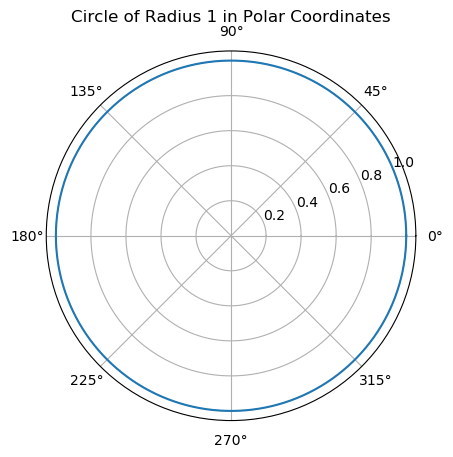

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Generate the theta values (angles in radians) for a full circle

PremTable = np.loadtxt('/home/dehy0499/OscProb/PremTables/prem_44layers.txt')

Rprem = PremTable[:,0]
print(Rprem)


theta = np.linspace(0, 2 * np.pi, 500)  # 0 to 2π with 500 points

# Radius is constant (1 for a unit circle)
radius = np.ones_like(theta)

# Create the plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, radius, label='Radius = 1')

# Add title and legend
ax.set_title("Circle of Radius 1 in Polar Coordinates", va='bottom')
#ax.legend()

# Show the plot
plt.show()

<Figure size 640x480 with 0 Axes>

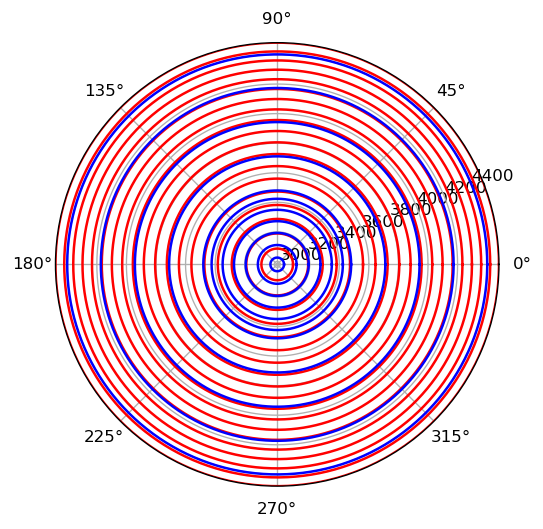

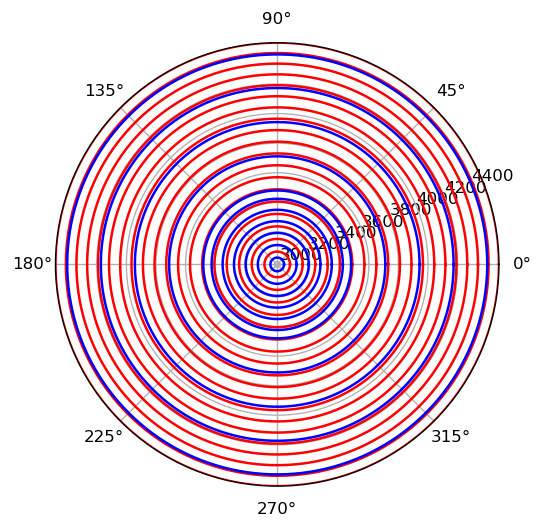

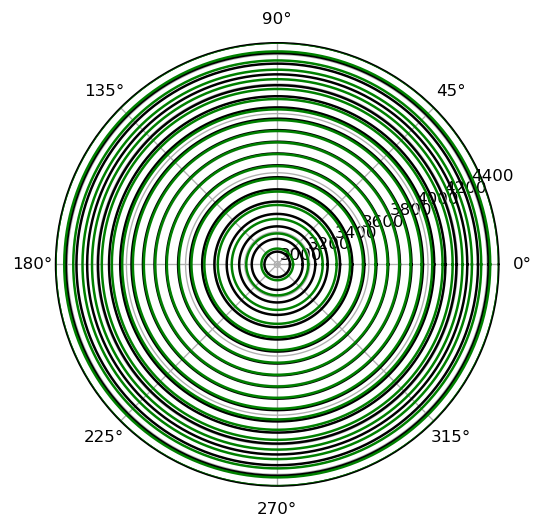

[2980.         3087.04068028 3189.43899834 3287.62876361 3381.97655983
 3472.79553327 3560.35573803 3644.8920351  3726.61021767 3805.691827
 3882.2979858  3956.57248382 4028.64428681 4098.6295954  4166.633549
 4232.75164684 4297.07094156 4359.67104842 4420.62500387 4480.        ]
[2980.         3066.51842209 3152.30695672 3237.34518464 3321.6128652
 3405.08994115 3487.75654342 3569.59299584 3650.57981985 3730.69773909
 3809.92768405 3888.25079653 3965.64843422 4042.10217505 4117.59382164
 4192.10540559 4265.61919179 4338.11768261 4409.58362208 4480.        ]


In [79]:
import numpy as np
import matplotlib.pyplot as plt

import math
 
# Radii of the circles
plt.clf()  # Clears the current figure

PremTable = np.loadtxt('/home/dehy0499/OscProb/PremTables/prem_44layers.txt')

Rprem = PremTable[17:31,0]
# Evenly spaced in th
Rdet = 6371
Rcmb = 3480 - 500
#R= Rcmb +1000

R=Rcmb + 1500;

zenithBins = 20

zenithMin =  math.asin(Rcmb/Rdet)
zenithMax =  math.asin(R/Rdet)
Rbinsth =  Rdet * np.sin(np.linspace(zenithMin, zenithMax, zenithBins)) 

Cth = np.linspace(np.cos(math.pi - zenithMin),np.cos(math.pi - zenithMax),zenithBins) 

Sth = np.sqrt(1-Cth**2)
RbinsCth = Rdet*Sth


# Create theta values for a full circle
theta = np.linspace(0, 2 * np.pi, 500)

# Set up the polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, dpi=120)

# Plot each circle
for rr in RbinsCth:
    ax.plot(theta, np.full_like(theta, rr), color=edgecolor)

# Plot each circle
for r in Rprem:
    ax.plot(theta, np.full_like(theta, r), color='blue')




# Set up the polar plot
fig2, ax2 = plt.subplots(subplot_kw={'projection': 'polar'}, dpi=120)

# Plot each circle
for rr in Rbinsth:
    ax2.plot(theta, np.full_like(theta, rr), color=edgecolor)

# Plot each circle
for r in Rprem:
    ax2.plot(theta, np.full_like(theta, r), color='blue')


# Set up the polar plot
fig3, ax3 = plt.subplots(subplot_kw={'projection': 'polar'}, dpi=120)

# Plot each circle
for rr in Rbinsth:
    ax3.plot(theta, np.full_like(theta, rr), color='black')

# Plot each circle
for r in RbinsCth:
    ax3.plot(theta, np.full_like(theta, r), color='green')





#ax.set_rlim(min(Rprem), max(Rprem))  # Set radial limits from 0 to 2
#ax2.set_rlim(min(Rprem), max(Rprem))  # Set radial limits from 0 to 2
#ax3.set_rlim(min(Rprem), max(Rprem))  # Set radial limits from 0 to 2

ax.set_rlim(Rcmb, R)  # Set radial limits from 0 to 2
ax2.set_rlim(Rcmb, R)  # Set radial limits from 0 to 2
ax3.set_rlim(Rcmb, R)  # Set radial limits from 0 to 2

# Add legend and title

plt.show()

print(RbinsCth)
print(Rbinsth)